In [16]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
from typing import Tuple, List, Dict, Any

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest, jarque_bera
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [17]:
train = pd.read_parquet('drw-crypto-market-prediction/train.parquet')
test = pd.read_parquet('drw-crypto-market-prediction/test.parquet')
sample_sub = pd.read_csv('drw-crypto-market-prediction/sample_submission.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Sample submission shape: {sample_sub.shape}")

Train shape: (525887, 896)
Test shape: (538150, 896)
Sample submission shape: (538150, 2)


In [18]:
train.describe()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X8

In [19]:
print("=== BASIC DATA OVERVIEW ===")
print(f"Training columns: {train.shape[1]}")
print(f"Test columns: {test.shape[1]}")

# Check common columns
train_cols = set(train.columns)
test_cols = set(test.columns)
common_cols = train_cols.intersection(test_cols)
train_only = train_cols - test_cols
test_only = test_cols - train_cols

print(f"Common columns: {len(common_cols)}")
print(f"Train only: {list(train_only)}")
print(f"Test only: {list(test_only)}")

# Data types
print(f"\nData types:")
print(train.dtypes.value_counts())

# Memory usage
train_memory = train.memory_usage(deep=True).sum() / 1024**2
test_memory = test.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemory usage:")
print(f"Train: {train_memory:.1f} MB")
print(f"Test: {test_memory:.1f} MB")

=== BASIC DATA OVERVIEW ===
Training columns: 896
Test columns: 896
Common columns: 896
Train only: []
Test only: []

Data types:
float64    896
Name: count, dtype: int64

Memory usage:
Train: 3598.9 MB
Test: 3678.8 MB


In [20]:
target = train['label']

print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Count: {len(target):,}")
print(f"Mean: {target.mean():.6f}")
print(f"Median: {target.median():.6f}")
print(f"Std: {target.std():.6f}")
print(f"Min: {target.min():.6f}")
print(f"Max: {target.max():.6f}")
print(f"Skewness: {target.skew():.6f}")
print(f"Kurtosis: {target.kurtosis():.6f}")

# Normality test
try:
    stat, p_value = normaltest(target.dropna())
    print(f"Normality test p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("Target is NOT normally distributed")
    else:
        print("Target appears normally distributed")
except:
    print("Could not perform normality test")

# Outliers using IQR
Q1, Q3 = target.quantile(0.25), target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = target[(target < lower_bound) | (target > upper_bound)]
print(f"Outliers (IQR method): {len(outliers)} ({len(outliers)/len(target)*100:.2f}%)")

=== TARGET VARIABLE ANALYSIS ===
Count: 525,887
Mean: 0.036126
Median: 0.016262
Std: 1.009914
Min: -24.416615
Max: 20.740270
Skewness: -0.113488
Kurtosis: 15.991745
Normality test p-value: 0.000000
Target is NOT normally distributed
Outliers (IQR method): 40161 (7.64%)


In [21]:
def reduce_mem_usage(dataframe, dataset):
    print('Reducing memory usage for:', dataset)
    initial_mem_usage = dataframe.memory_usage().sum() / 1024**2

    for col in dataframe.columns:
        col_type = dataframe[col].dtype

        c_min = dataframe[col].min()
        c_max = dataframe[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                dataframe[col] = dataframe[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                dataframe[col] = dataframe[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                dataframe[col] = dataframe[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                dataframe[col] = dataframe[col].astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                dataframe[col] = dataframe[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                dataframe[col] = dataframe[col].astype(np.float32)
            else:
                dataframe[col] = dataframe[col].astype(np.float64)

    final_mem_usage = dataframe.memory_usage().sum() / 1024**2
    print('--- Memory usage before: {:.2f} MB'.format(initial_mem_usage))
    print('--- Memory usage after: {:.2f} MB'.format(final_mem_usage))
    print('--- Decreased memory usage by {:.1f}%\n'.format(100 * (initial_mem_usage - final_mem_usage) / initial_mem_usage))

    return dataframe

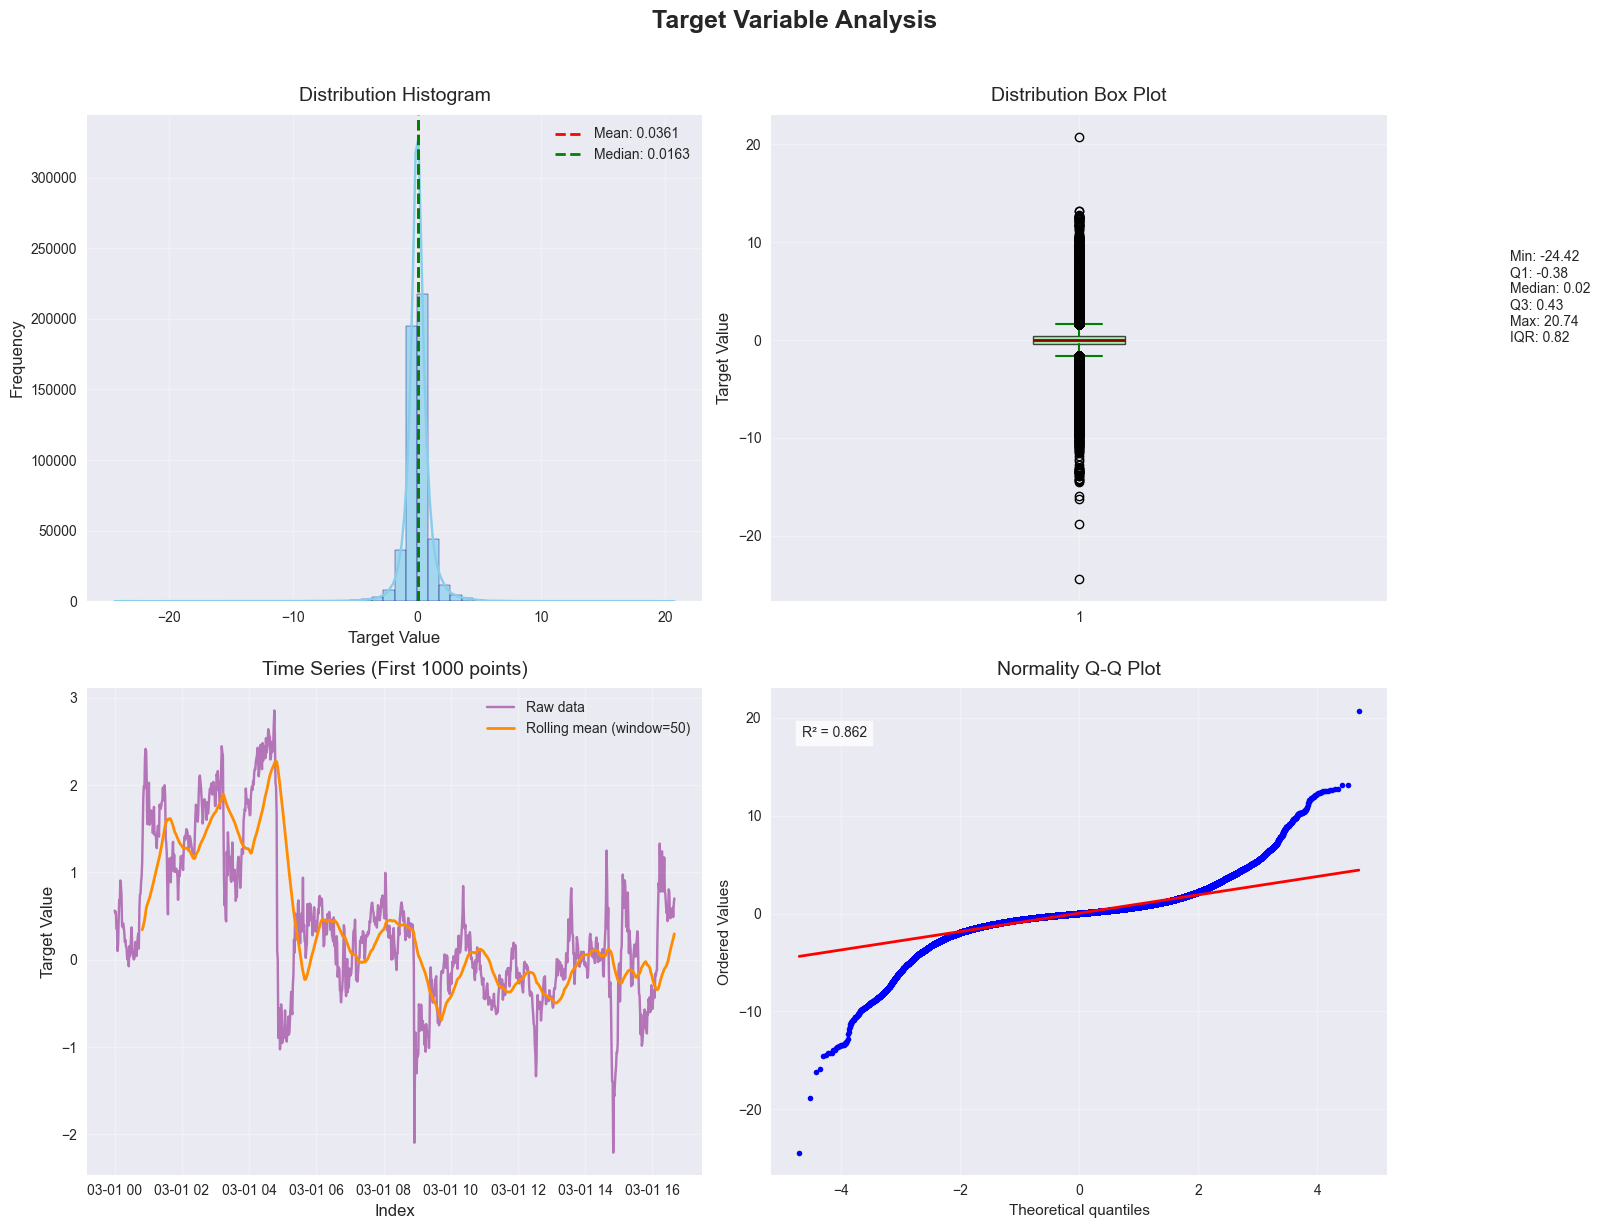

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
fig.suptitle('Target Variable Analysis', fontsize=18, y=1.02, fontweight='bold')

# Histogram with KDE
sns.histplot(target, bins=50, kde=True, ax=axes[0,0], color='skyblue', edgecolor='navy', alpha=0.7)
axes[0,0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {target.mean():.4f}')
axes[0,0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {target.median():.4f}')
axes[0,0].set_title('Distribution Histogram', fontsize=14, pad=10)
axes[0,0].set_xlabel('Target Value', fontsize=12)
axes[0,0].set_ylabel('Frequency', fontsize=12)
axes[0,0].legend(fontsize=10, framealpha=0.9)
axes[0,0].grid(True, alpha=0.3)
# Box plot with annotations
box = axes[0,1].boxplot(target, patch_artist=True,
                        boxprops=dict(facecolor='lightgreen', alpha=0.7),
                        whiskerprops=dict(color='green', linewidth=1.5),
                        capprops=dict(color='green', linewidth=1.5),
                        medianprops=dict(color='darkred', linewidth=2))

# summary statistics
stats_text = f"""
Min: {np.min(target):.2f}
Q1: {np.percentile(target, 25):.2f}
Median: {np.median(target):.2f}
Q3: {np.percentile(target, 75):.2f}
Max: {np.max(target):.2f}
IQR: {np.percentile(target, 75) - np.percentile(target, 25):.2f}
"""
axes[0,1].text(1.2, 0.5, stats_text, transform=axes[0,1].transAxes,
              bbox=dict(facecolor='white', alpha=0.8), fontsize=10)
axes[0,1].set_title('Distribution Box Plot', fontsize=14, pad=10)
axes[0,1].set_ylabel('Target Value', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# Time series with rolling average
sample_size = min(1000, len(target))
rolling_window = sample_size // 20  # 5% of sample size

axes[1,0].plot(target[:sample_size], alpha=0.5, color='purple', label='Raw data')
axes[1,0].plot(pd.Series(target[:sample_size]).rolling(rolling_window).mean(),
              color='darkorange', linewidth=2, label=f'Rolling mean (window={rolling_window})')
axes[1,0].set_title(f'Time Series (First {sample_size} points)', fontsize=14, pad=10)
axes[1,0].set_xlabel('Index', fontsize=12)
axes[1,0].set_ylabel('Target Value', fontsize=12)
axes[1,0].legend(fontsize=10)
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot with R² value
stats.probplot(target, dist="norm", plot=axes[1,1])
axes[1,1].lines[0].set_markerfacecolor('blue')
axes[1,1].lines[0].set_markersize(4.0)
axes[1,1].lines[1].set_color('red')
axes[1,1].lines[1].set_linewidth(2.0)

# Calculate R² for the Q-Q plot
(osm, osr), (slope, intercept, r) = stats.probplot(target, dist="norm")
axes[1,1].text(0.05, 0.9, f'R² = {r**2:.3f}', transform=axes[1,1].transAxes,
              bbox=dict(facecolor='white', alpha=0.8))
axes[1,1].set_title('Normality Q-Q Plot', fontsize=14, pad=10)
axes[1,1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
print("=== MISSING VALUES ANALYSIS ===")

# Training data
train_missing = train.isnull().sum()
train_missing_pct = (train_missing / len(train)) * 100
train_missing_df = pd.DataFrame({
    'Missing_Count': train_missing,
    'Missing_Percent': train_missing_pct
})
train_missing_df = train_missing_df[train_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"Training data:")
print(f"Columns with missing values: {len(train_missing_df)}")
if len(train_missing_df) > 0:
    print("Top 10 columns with missing values:")
    print(train_missing_df.head(10))
else:
    print("No missing values in training data!")

# Test data
test_missing = test.isnull().sum()
test_missing_pct = (test_missing / len(test)) * 100
test_missing_df = pd.DataFrame({
    'Missing_Count': test_missing,
    'Missing_Percent': test_missing_pct
})
test_missing_df = test_missing_df[test_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"\nTest data:")
print(f"Columns with missing values: {len(test_missing_df)}")
if len(test_missing_df) > 0:
    print("Top 10 columns with missing values:")
    print(test_missing_df.head(10))
else:
    print("No missing values in test data!")

=== MISSING VALUES ANALYSIS ===
Training data:
Columns with missing values: 0
No missing values in training data!

Test data:
Columns with missing values: 0
No missing values in test data!


In [24]:
print("=== FEATURE CORRELATION ANALYSIS ===")

# Get feature columns (exclude target)
feature_cols = [col for col in train.columns if col != 'label']
print(f"Analyzing {len(feature_cols)} features")

# Calculate correlations with target
correlations = []
target = train['label']

for col in feature_cols:
    try:
        corr, p_value = pearsonr(train[col].fillna(0), target)
        if not np.isnan(corr):
            correlations.append({
                'Feature': col,
                'Correlation': corr,
                'Abs_Correlation': abs(corr),
                'P_Value': p_value
            })
    except:
        continue

# Create correlation dataframe
corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

print(f"Successfully calculated correlations for {len(corr_df)} features")
print(f"\nTop 20 features by absolute correlation:")
print("-" * 60)
for i, row in corr_df.head(20).iterrows():
    significance = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['P_Value'] < 0.05 else ""
    print(f"{row['Feature']:>15}: {row['Correlation']:>8.6f} {significance}")

# Correlation strength distribution
strong_corr = corr_df[corr_df['Abs_Correlation'] > 0.1]
moderate_corr = corr_df[(corr_df['Abs_Correlation'] > 0.05) & (corr_df['Abs_Correlation'] <= 0.1)]
weak_corr = corr_df[corr_df['Abs_Correlation'] <= 0.05]

print(f"\nCorrelation strength distribution:")
print(f"Strong (|r| > 0.1): {len(strong_corr)} features")
print(f"Moderate (0.05 < |r| ≤ 0.1): {len(moderate_corr)} features")
print(f"Weak (|r| ≤ 0.05): {len(weak_corr)} features")

=== FEATURE CORRELATION ANALYSIS ===
Analyzing 895 features
Successfully calculated correlations for 868 features

Top 20 features by absolute correlation:
------------------------------------------------------------
            X21: 0.069401 ***
            X20: 0.067667 ***
            X28: 0.064092 ***
           X863: 0.064057 ***
            X29: 0.062339 ***
            X19: 0.062293 ***
            X27: 0.062251 ***
            X22: 0.057676 ***
           X858: 0.057320 ***
           X219: 0.056713 ***
           X860: 0.056259 ***
           X531: -0.056184 ***
           X287: 0.055893 ***
           X289: 0.055892 ***
           X291: 0.055435 ***
           X293: 0.055291 ***
           X857: 0.054686 ***
           X295: 0.054637 ***
           X598: 0.054528 ***
           X218: 0.053676 ***

Correlation strength distribution:
Strong (|r| > 0.1): 0 features
Moderate (0.05 < |r| ≤ 0.1): 31 features
Weak (|r| ≤ 0.05): 837 features


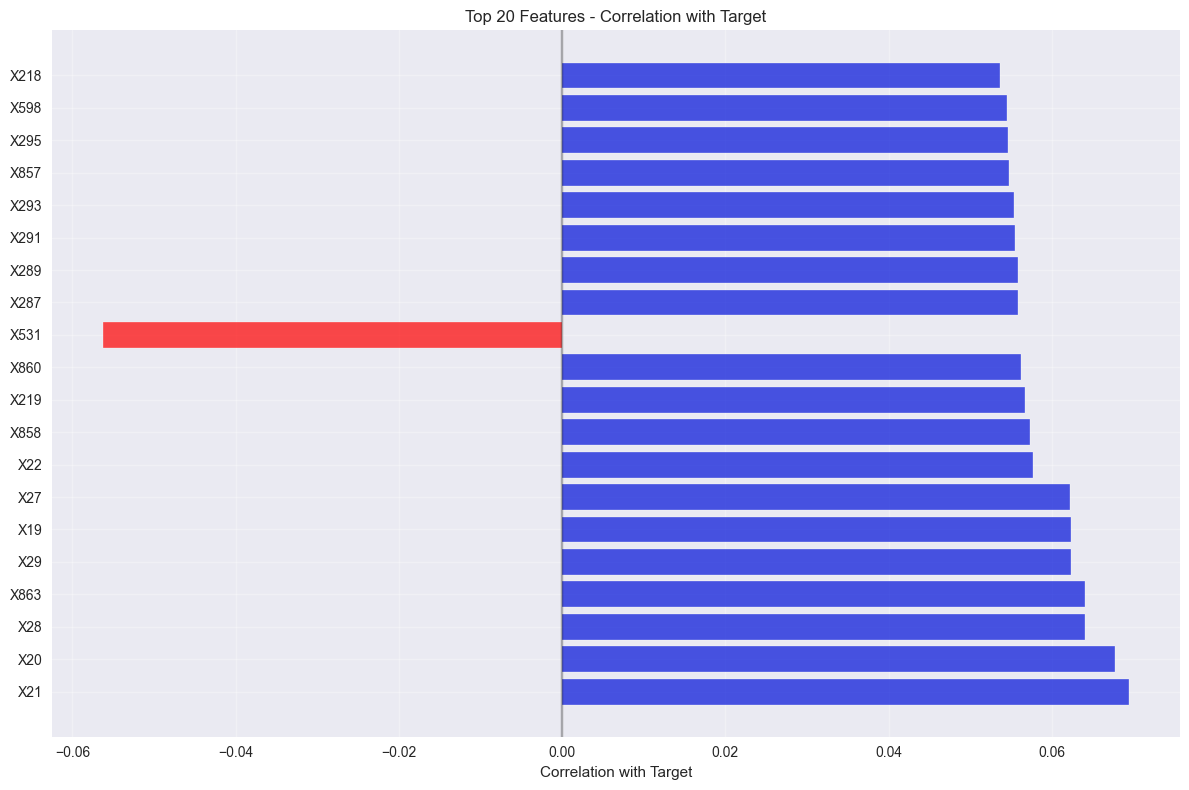

In [25]:
# Top correlations bar plot
top_20 = corr_df.head(20)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else '#0010d9' for x in top_20['Correlation']]
plt.barh(range(len(top_20)), top_20['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Correlation with Target')
plt.title('Top 20 Features - Correlation with Target')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

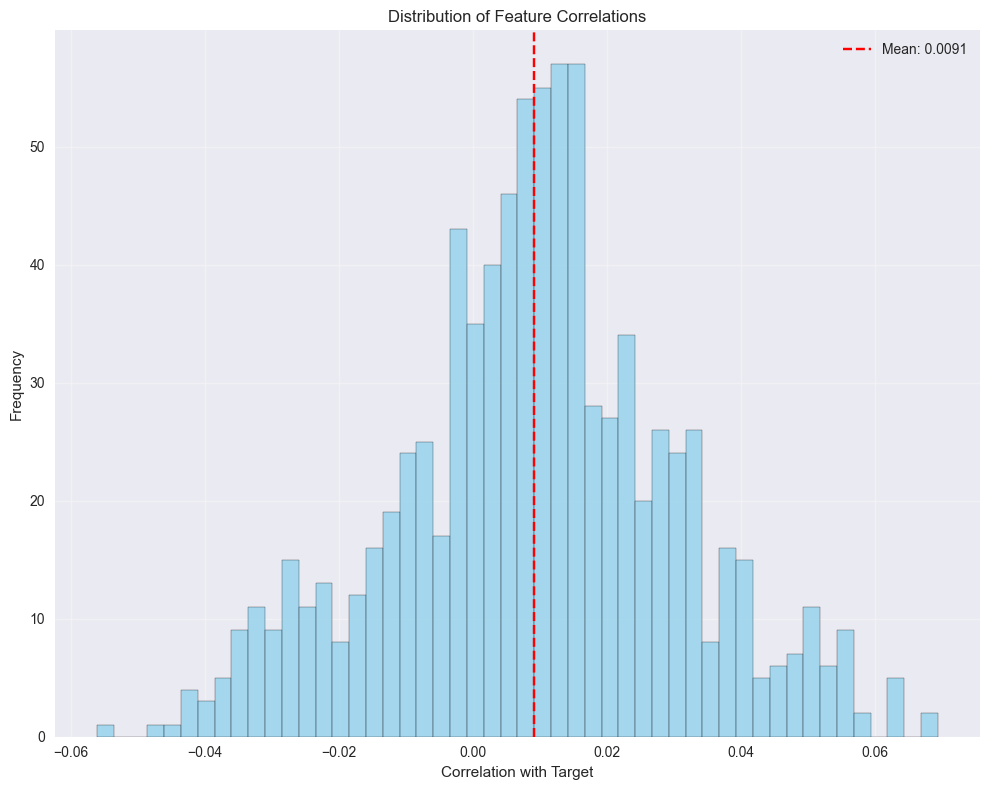

In [26]:
# Correlation distribution
plt.figure(figsize=(10, 8))
plt.hist(corr_df['Correlation'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(corr_df['Correlation'].mean(), color='red', linestyle='--',
           label=f'Mean: {corr_df["Correlation"].mean():.4f}')
plt.xlabel('Correlation with Target')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Correlations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

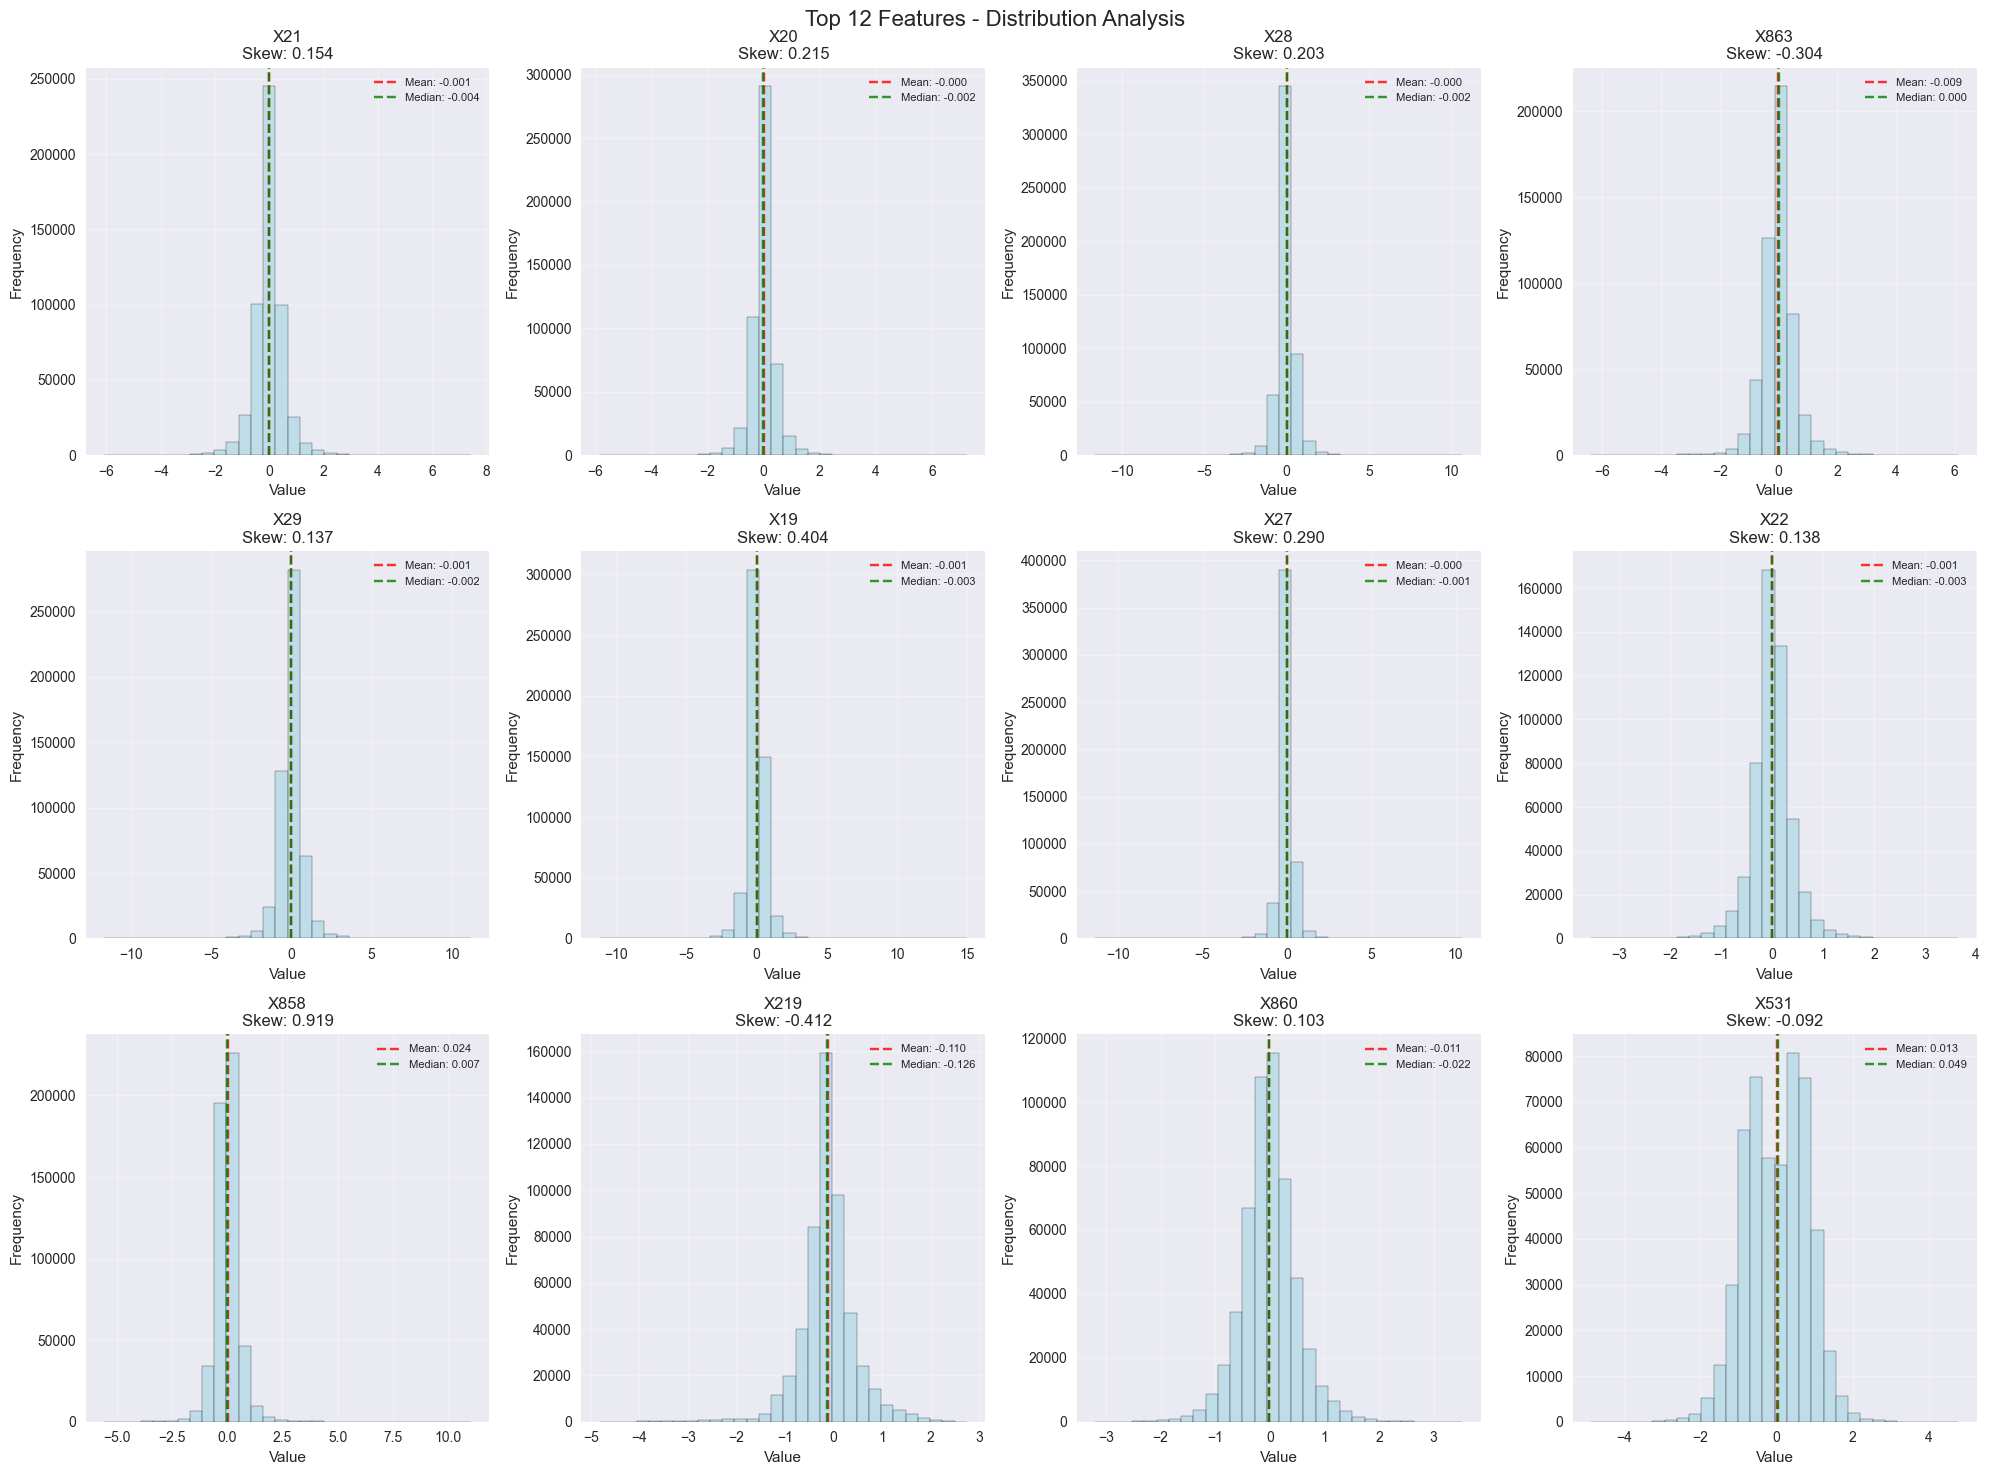

In [27]:
# Analyze top 12 features distributions
top_features = corr_df.head(12)['Feature'].tolist()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Top 12 Features - Distribution Analysis', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(top_features):
    data = train[feature].dropna()

    # Histogram
    axes[i].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black')

    # Add mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.3f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.3f}')

    axes[i].set_title(f'{feature}\nSkew: {data.skew():.3f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
print("=== FEATURE STATISTICS SUMMARY ===")

# Get top 20 features for detailed analysis
top_20_features = corr_df.head(20)['Feature'].tolist()

# Create summary statistics
summary_stats = []
for feature in top_20_features:
    data = train[feature].dropna()
    stats_dict = {
        'Feature': feature,
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        'Correlation': corr_df[corr_df['Feature'] == feature]['Correlation'].iloc[0]
    }
    summary_stats.append(stats_dict)

summary_df = pd.DataFrame(summary_stats)
print("Top 20 Features Summary Statistics:")
summary_df.round(4)

=== FEATURE STATISTICS SUMMARY ===
Top 20 Features Summary Statistics:


,Feature,Count,Mean,Std,Min,Max,Skewness,Kurtosis,Correlation
0,X21,525887,-0.0006,0.5753,-6.0847,7.4383,0.1542,8.7727,0.0694
1,X20,525887,-0.0004,0.4528,-5.8368,7.2461,0.2155,12.2882,0.0677
2,X28,525887,-0.0004,0.5873,-11.6092,10.6913,0.2035,14.7482,0.0641
3,X863,525887,-0.0094,0.5926,-6.3780,6.1179,-0.3039,10.5967,0.0641
4,X29,525887,-0.0006,0.7559,-11.6784,11.2066,0.1368,10.2020,0.0623
5,X19,525887,-0.0005,0.7037,-11.1577,14.9586,0.4044,17.1574,0.0623
6,X27,525887,-0.0002,0.4540,-11.3461,10.4119,0.2898,20.8639,0.0623
7,X22,525887,-0.0008,0.4081,-3.5585,3.6476,0.1378,5.1117,0.0577
8,X858,525887,0.0241,0.5413,-5.5692,11.0470,0.9192,12.7484,0.0573
9,X219,525887,-0.1104,0.5649,-4.8124,2.7422,-0.4121,5.8130,0.0567


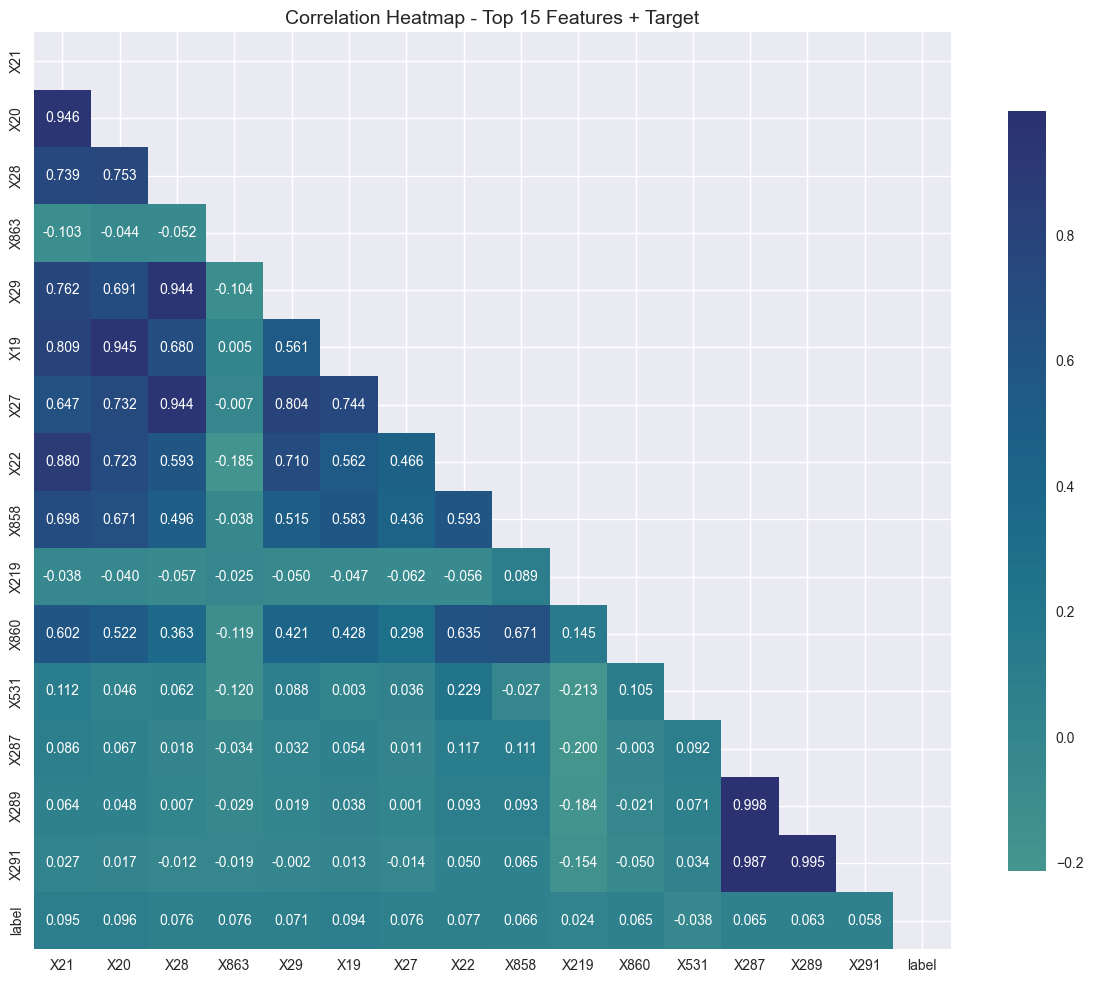

In [29]:
# Create correlation heatmap for top features
top_15_features = corr_df.head(15)['Feature'].tolist() + ['label']

# Sample data if too large
if len(train) > 5000:
    sample_data = train[top_15_features].sample(n=5000, random_state=42)
else:
    sample_data = train[top_15_features]

correlation_matrix = sample_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='crest',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap - Top 15 Features + Target', fontsize=14)
plt.tight_layout()
plt.show()

=== FEATURE VALUE RANGES ANALYSIS ===
Top 10 Features - Value Ranges:
  Feature        Min        Max      Range  1st_Quartile  3rd_Quartile  \
0     X21  -6.084697   7.438298  13.522995     -0.249627      0.246193   
1     X20  -5.836804   7.246099  13.082903     -0.184192      0.182678   
2     X28 -11.609230  10.691307  22.300537     -0.237477      0.232789   
3    X863  -6.378032   6.117887  12.495919     -0.282482      0.255341   
4     X29 -11.678420  11.206645  22.885066     -0.325992      0.322783   
5     X19 -11.157721  14.958593  26.116314     -0.271923      0.267984   
6     X27 -11.346147  10.411920  21.758067     -0.173128      0.169785   
7     X22  -3.558510   3.647619   7.206129     -0.195590      0.190618   
8    X858  -5.569221  11.046962  16.616183     -0.229482      0.257750   
9    X219  -4.812384   2.742236   7.554620     -0.364558      0.132104   

        IQR  Correlation  
0  0.495820     0.069401  
1  0.366870     0.067667  
2  0.470267     0.064092  
3  0.53

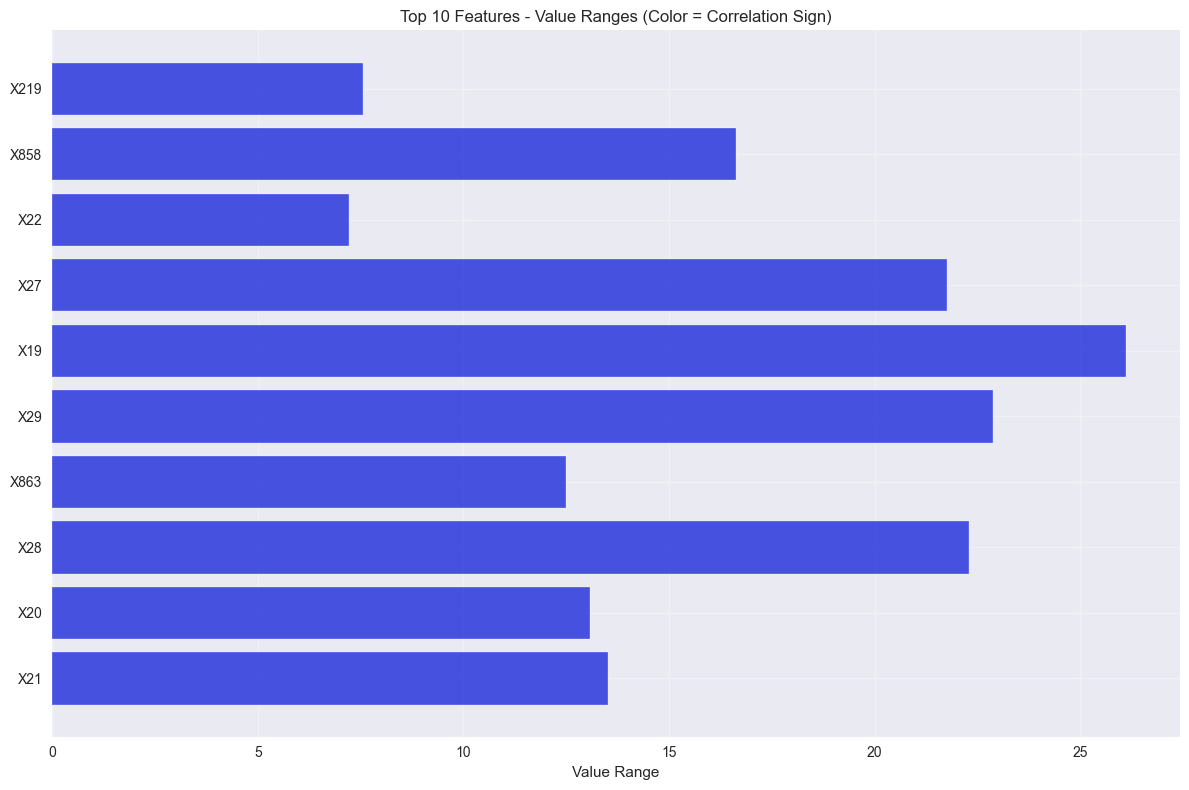

In [30]:
print("=== FEATURE VALUE RANGES ANALYSIS ===")

# Analyze value ranges for top features
top_10_features = corr_df.head(10)['Feature'].tolist()

range_analysis = []
for feature in top_10_features:
    data = train[feature].dropna()
    range_dict = {
        'Feature': feature,
        'Min': data.min(),
        'Max': data.max(),
        'Range': data.max() - data.min(),
        '1st_Quartile': data.quantile(0.25),
        '3rd_Quartile': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Correlation': corr_df[corr_df['Feature'] == feature]['Correlation'].iloc[0]
    }
    range_analysis.append(range_dict)

range_df = pd.DataFrame(range_analysis)
print("Top 10 Features - Value Ranges:")
print(range_df.round(6))

# Visualize ranges
plt.figure(figsize=(12, 8))
features = range_df['Feature']
ranges = range_df['Range']
colors = ['red' if x < 0 else '#0010d9' for x in range_df['Correlation']]

plt.barh(range(len(features)), ranges, color=colors, alpha=0.7)
plt.yticks(range(len(features)), features)
plt.xlabel('Value Range')
plt.title('Top 10 Features - Value Ranges (Color = Correlation Sign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
print("=== DATA QUALITY ASSESSMENT ===")

# Check for constant features
constant_features = []
for col in train.columns:
    if col != 'label':
        if train[col].nunique() <= 1:
            constant_features.append(col)

print(f"Constant features (nunique <= 1): {len(constant_features)}")
if constant_features:
    print("Constant features:", constant_features[:10])

# Check for highly skewed features
highly_skewed = []
for feature in corr_df.head(20)['Feature']:
    skew_val = train[feature].skew()
    if abs(skew_val) > 2:
        highly_skewed.append((feature, skew_val))

print(f"\nHighly skewed features (|skew| > 2): {len(highly_skewed)}")
for feature, skew_val in highly_skewed[:10]:
    print(f"  {feature}: {skew_val:.3f}")

# Check feature correlations between themselves
print(f"\nInter-feature correlation analysis:")
top_features_for_corr = corr_df.head(10)['Feature'].tolist()
feature_corr_matrix = train[top_features_for_corr].corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i+1, len(feature_corr_matrix.columns)):
        corr_val = feature_corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:  # High correlation threshold
            high_corr_pairs.append((
                feature_corr_matrix.columns[i],
                feature_corr_matrix.columns[j],
                corr_val
            ))

print(f"Highly correlated feature pairs (|r| > 0.8): {len(high_corr_pairs)}")
for feat1, feat2, corr_val in high_corr_pairs:
    print(f"  {feat1} <-> {feat2}: {corr_val:.4f}")

=== DATA QUALITY ASSESSMENT ===
Constant features (nunique <= 1): 27
Constant features: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706']

Highly skewed features (|skew| > 2): 0

Inter-feature correlation analysis:
Highly correlated feature pairs (|r| > 0.8): 7
  X21 <-> X20: 0.9490
  X21 <-> X19: 0.8201
  X21 <-> X22: 0.8842
  X20 <-> X19: 0.9486
  X28 <-> X29: 0.9478
  X28 <-> X27: 0.9482
  X29 <-> X27: 0.8174


=== PCA-BASED FEATURE IMPORTANCE ANALYSIS ===


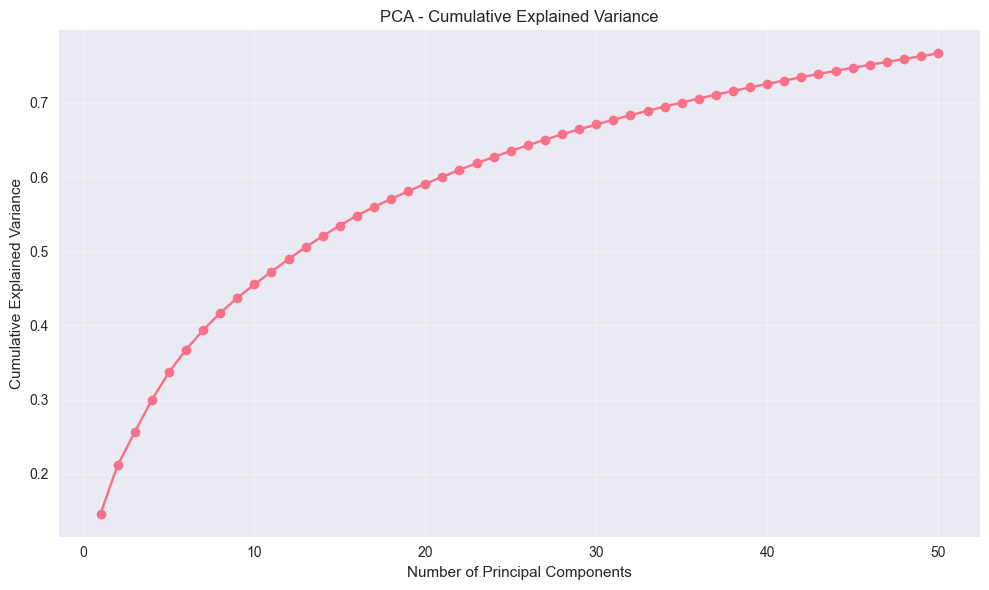

Top 10 contributing features for each of the first 5 principal components:
PC1: ['X726', 'X727', 'X728', 'X729', 'X724', 'X725', 'X433', 'X845', 'X731', 'X730']
PC2: ['X720', 'X721', 'X12', 'X245', 'X238', 'X13', 'X11', 'X246', 'X259', 'X258']
PC3: ['X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X44', 'X51', 'X52', 'X42']
PC4: ['X859', 'X773', 'X772', 'X744', 'X745', 'X769', 'X777', 'X776', 'X768', 'X829']
PC5: ['X452', 'X445', 'X451', 'X459', 'X444', 'X458', 'X450', 'X457', 'X473', 'X443']

Most frequently appearing features in top principal components:
X726: 1 times
X727: 1 times
X728: 1 times
X729: 1 times
X724: 1 times
X725: 1 times
X433: 1 times
X845: 1 times
X731: 1 times
X730: 1 times
X720: 1 times
X721: 1 times
X12: 1 times
X245: 1 times
X238: 1 times


In [32]:
print("=== PCA-BASED FEATURE IMPORTANCE ANALYSIS ===")

# Prepare feature matrix (exclude target and constant features)
feature_cols = [col for col in train.columns if col != 'label' and col not in constant_features]
X = train[feature_cols].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
n_components = min(50, X_scaled.shape[1])
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find most important features for the top principal components
n_top_components = 5
top_features_per_pc = {}

for i in range(n_top_components):
    component = pca.components_[i]
    abs_loadings = np.abs(component)
    top_idx = abs_loadings.argsort()[::-1][:10]
    top_features = [feature_cols[idx] for idx in top_idx]
    top_features_per_pc[f'PC{i+1}'] = top_features

print(f"Top 10 contributing features for each of the first {n_top_components} principal components:")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")

# Aggregate feature importance across top PCs
from collections import Counter
all_top_features = sum(top_features_per_pc.values(), [])
feature_counts = Counter(all_top_features)
most_common_features = feature_counts.most_common(15)

print("\nMost frequently appearing features in top principal components:")
for feat, count in most_common_features:
    print(f"{feat}: {count} times")

In [33]:
print("=== FILTERING OUT NOISY/OVERFITTING FEATURES ===")

# 1. Remove near-constant features (already identified as constant_features)
from sklearn.feature_selection import VarianceThreshold

# Set a low threshold to remove near-constant features (e.g., variance < 1e-5)
selector = VarianceThreshold(threshold=1e-5)
X_temp = train[[col for col in train.columns if col != 'label' and col not in constant_features]].fillna(0)
selector.fit(X_temp)
low_variance_features = [col for col, keep in zip(X_temp.columns, selector.get_support()) if not keep]

print(f"Near-constant features (variance < 1e-5): {len(low_variance_features)}")
if low_variance_features:
    print("Sample:", low_variance_features[:10])

# 2. Remove features with extremely high correlation to the target (possible leakage/overfitting)
# (e.g., |correlation| > 0.99)
overfit_corr_features = corr_df[corr_df['Abs_Correlation'] > 0.99]['Feature'].tolist()
print(f"Features with |correlation| > 0.99 to target: {len(overfit_corr_features)}")
if overfit_corr_features:
    print("Sample:", overfit_corr_features[:10])

# 3. Optionally, remove features with very low correlation to the target (not predictive)
# (e.g., |correlation| < 0.01)
low_corr_features = corr_df[corr_df['Abs_Correlation'] < 0.05]['Feature'].tolist()
print(f"Features with |correlation| < 0.05: {len(low_corr_features)}")
if low_corr_features:
    print("Sample:", low_corr_features[:10])

# Final set of filtered features
filtered_features = [
    col for col in train.columns
    if col != 'label'
    and col not in constant_features
    and col not in low_variance_features
    and col not in overfit_corr_features
    and col not in low_corr_features
    # Optionally exclude low_corr_features if you want a more compact set:
    # and col not in low_corr_features
]

print(f"\nFinal number of features after filtering: {len(filtered_features)}")

# You can now use train[filtered_features] for modeling to reduce overfitting/noise.

=== FILTERING OUT NOISY/OVERFITTING FEATURES ===
Near-constant features (variance < 1e-5): 0
Features with |correlation| > 0.99 to target: 0
Features with |correlation| < 0.05: 837
Sample: ['X303', 'X283', 'X30', 'X18', 'X465', 'X466', 'X181', 'X288', 'X290', 'X286']

Final number of features after filtering: 31


In [34]:
print("=" * 60)
print("🎯 FINAL EDA SUMMARY AND INSIGHTS")
print("=" * 60)

print(f"📊 Dataset Overview:")
print(f"  • Training samples: {len(train):,}")
print(f"  • Test samples: {len(test):,}")
print(f"  • Total features: {len([col for col in train.columns if col != 'label'])}")
print(f"  • Target variable: 'label'")

print(f"\n🎯 Target Variable:")
print(f"  • Mean: {target.mean():.6f}")
print(f"  • Std: {target.std():.6f}")
print(f"  • Skewness: {target.skew():.3f}")
print(f"  • Distribution: {'Normal' if abs(target.skew()) < 0.5 else 'Skewed'}")

print(f"\n🔍 Data Quality:")
missing_cols = len([col for col in train.columns if train[col].isnull().sum() > 0])
print(f"  • Columns with missing values: {missing_cols}")
print(f"  • Constant features: {len(constant_features)}")
print(f"  • Highly skewed features: {len(highly_skewed)}")

print(f"\n📈 Feature Correlations:")
print(f"  • Features with strong correlation (|r| > 0.1): {len(strong_corr)}")
print(f"  • Features with moderate correlation (0.05 < |r| ≤ 0.1): {len(moderate_corr)}")
print(f"  • Features with weak correlation (|r| ≤ 0.05): {len(weak_corr)}")

print(f"\n🏆 Top 5 Most Important Features:")
for i, row in corr_df.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Correlation']:.6f}")

print(f"\n💡 Key Insights:")
print(f"  • Target shows {'low' if target.std() < 0.01 else 'moderate' if target.std() < 0.1 else 'high'} variability")
print(f"  • {'Few' if len(strong_corr) < 10 else 'Many'} features show strong correlation with target")
print(f"  • Data appears {'clean' if missing_cols == 0 else 'to have missing values'}")
print(f"  • Feature engineering {'may' if len(highly_skewed) > 5 else 'might not'} be needed for skewed features")

print("\n EDA Complete! feel free to create a copy and share your insights in the comments !")
print(train.index.name)

🎯 FINAL EDA SUMMARY AND INSIGHTS
📊 Dataset Overview:
  • Training samples: 525,887
  • Test samples: 538,150
  • Total features: 895
  • Target variable: 'label'

🎯 Target Variable:
  • Mean: 0.036126
  • Std: 1.009914
  • Skewness: -0.113
  • Distribution: Normal

🔍 Data Quality:
  • Columns with missing values: 0
  • Constant features: 27
  • Highly skewed features: 0

📈 Feature Correlations:
  • Features with strong correlation (|r| > 0.1): 0
  • Features with moderate correlation (0.05 < |r| ≤ 0.1): 31
  • Features with weak correlation (|r| ≤ 0.05): 837

🏆 Top 5 Most Important Features:
  26. X21: 0.069401
  25. X20: 0.067667
  33. X28: 0.064092
  847. X863: 0.064057
  34. X29: 0.062339

💡 Key Insights:
  • Target shows high variability
  • Few features show strong correlation with target
  • Data appears clean
  • Feature engineering might not be needed for skewed features

 EDA Complete! feel free to create a copy and share your insights in the comments !
timestamp


In [35]:
print("=== MACHINE LEARNING REGRESSION MODELS ===")

# Import required libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgbm
import time

# Use the filtered features we identified earlier
X = train[filtered_features].copy()
y = train['label'].copy()

# Fill missing values
X = X.fillna(X.mean())

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Create dictionary to store model results
model_results = {}

# Helper function to evaluate and store model results
def evaluate_model(model, name, X_train, y_train, X_val, y_val, cv=5):
    start_time = time.time()
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True, random_state=42), 
                               scoring='neg_mean_squared_error')
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    # Store results
    model_results[name] = {
        'model': model,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'train_mae': train_mae,
        'val_mae': val_mae,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'cv_rmse': cv_rmse,
        'time': time.time() - start_time
    }
    
    print(f"{name}:")
    print(f"  Train MSE: {train_mse:.6f}, MAE: {train_mae:.6f}, R²: {train_r2:.6f}")
    print(f"  Val MSE: {val_mse:.6f}, MAE: {val_mae:.6f}, R²: {val_r2:.6f}")
    print(f"  CV RMSE: {cv_rmse:.6f}, Time: {model_results[name]['time']:.2f}s")
    
    return model


=== MACHINE LEARNING REGRESSION MODELS ===
Training data shape: (420709, 31)
Validation data shape: (105178, 31)


In [36]:
len(filtered_features)

31

In [37]:
# 1. Linear Regression (baseline)
print("\n--- Linear Regression ---")
lr = LinearRegression()
lr = evaluate_model(lr, "Linear Regression", X_train, y_train, X_val, y_val)


--- Linear Regression ---
Linear Regression:
  Train MSE: 0.989725, MAE: 0.632650, R²: 0.026486
  Val MSE: 1.005307, MAE: 0.635614, R²: 0.026794
  CV RMSE: 0.996513, Time: 0.78s


In [38]:
# 2. Ridge Regression
print("\n--- Ridge Regression ---")
ridge = Ridge(alpha=1.0, random_state=42)
ridge = evaluate_model(ridge, "Ridge", X_train, y_train, X_val, y_val)


--- Ridge Regression ---
Ridge:
  Train MSE: 0.990289, MAE: 0.632834, R²: 0.025931
  Val MSE: 1.005810, MAE: 0.635737, R²: 0.026307
  CV RMSE: 0.996779, Time: 0.61s


In [40]:
# 3. Lasso Regression
print("\n--- Lasso Regression ---")
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso = evaluate_model(lasso, "Lasso", X_train, y_train, X_val, y_val)


--- Lasso Regression ---
Lasso:
  Train MSE: 0.991011, MAE: 0.632549, R²: 0.025222
  Val MSE: 1.006577, MAE: 0.635556, R²: 0.025565
  CV RMSE: 0.997117, Time: 6.66s


In [41]:
# 4. ElasticNet
print("\n--- ElasticNet ---")
elastic = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42, max_iter=10000)
elastic = evaluate_model(elastic, "ElasticNet", X_train, y_train, X_val, y_val)


--- ElasticNet ---
ElasticNet:
  Train MSE: 0.990681, MAE: 0.632552, R²: 0.025547
  Val MSE: 1.006260, MAE: 0.635544, R²: 0.025872
  CV RMSE: 0.996962, Time: 9.36s


In [42]:
# 5. Random Forest
print("\n--- Random Forest ---")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf = evaluate_model(rf, "Random Forest", X_train, y_train, X_val, y_val)


--- Random Forest ---
Random Forest:
  Train MSE: 0.787634, MAE: 0.581553, R²: 0.225268
  Val MSE: 0.806773, MAE: 0.586664, R²: 0.218988
  CV RMSE: 0.896010, Time: 380.36s


In [ ]:
# 6. Gradient Boosting
print("\n--- Gradient Boosting ---")
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb = evaluate_model(gb, "Gradient Boosting", X_train, y_train, X_val, y_val)

In [ ]:
# 7. XGBoost
print("\n--- XGBoost ---")
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
xgb_model = evaluate_model(xgb_model, "XGBoost", X_train, y_train, X_val, y_val)

In [ ]:
# 8. LightGBM
print("\n--- LightGBM ---")
lgbm_model = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
lgbm_model = evaluate_model(lgbm_model, "LightGBM", X_train, y_train, X_val, y_val)

In [ ]:
# Visualize model performance comparison
model_names = list(model_results.keys())
val_mses = [model_results[m]['val_mse'] for m in model_names]
val_r2s = [model_results[m]['val_r2'] for m in model_names]
cv_rmses = [model_results[m]['cv_rmse'] for m in model_names]
times = [model_results[m]['time'] for m in model_names]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, y=1.02)

# 1. Validation MSE
axes[0, 0].bar(model_names, val_mses, color='skyblue')
axes[0, 0].set_title('Validation MSE (lower is better)')
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# 2. Validation R²
axes[0, 1].bar(model_names, val_r2s, color='lightgreen')
axes[0, 1].set_title('Validation R² (higher is better)')
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-Validation RMSE
axes[1, 0].bar(model_names, cv_rmses, color='salmon')
axes[1, 0].set_title('Cross-Validation RMSE (lower is better)')
axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Computation Time
axes[1, 1].bar(model_names, times, color='lightgray')
axes[1, 1].set_title('Computation Time (seconds)')
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Get feature importance from tree-based models
print("=== FEATURE IMPORTANCE FROM TREE-BASED MODELS ===")

# Get best model based on validation MSE
best_model_name = min(model_results, key=lambda k: model_results[k]['val_mse'])
print(f"Best model based on validation MSE: {best_model_name} (MSE: {model_results[best_model_name]['val_mse']:.6f})")

# Extract feature importance from tree-based models
if 'Random Forest' in model_results:
    rf_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_results['Random Forest']['model'].feature_importances_
    }).sort_values('Importance', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=rf_feature_importance, palette='viridis')
    plt.title('Random Forest - Top 20 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nRandom Forest - Top 10 Important Features:")
    for i, row in rf_feature_importance.head(10).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.6f}")

if 'XGBoost' in model_results:
    xgb_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_results['XGBoost']['model'].feature_importances_
    }).sort_values('Importance', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance, palette='plasma')
    plt.title('XGBoost - Top 20 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nXGBoost - Top 10 Important Features:")
    for i, row in xgb_feature_importance.head(10).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.6f}")


In [ ]:
# Generate predictions on test data using the best model
print("\n=== PREDICTIONS ON TEST DATA ===")

best_model = model_results[best_model_name]['model']

# Prepare test data
X_test = test[filtered_features].copy()
X_test = X_test.fillna(X_test.mean())  # Fill NAs with mean 

# Generate predictions
test_predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'ID': sample_sub['ID'],
    'predictions': test_predictions
})

print(f"Test predictions summary:")
print(f"  Count: {len(test_predictions)}")
print(f"  Mean: {test_predictions.mean():.6f}")
print(f"  Std: {test_predictions.std():.6f}")
print(f"  Min: {test_predictions.min():.6f}")
print(f"  Max: {test_predictions.max():.6f}")

# Save submission
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created.")
